In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV,ElasticNetCV
from pyentrp import entropy as pyent
import EntropyHub as EH
import neurokit2 as nk
import random
import sampen
import requests
import io
import apache_log_parser
from pprint import pprint
import os
from sklearn import preprocessing
from typing import List
import itertools

In [2]:
df_wc_day37_1 = pd.read_csv(f"wc_day37_1.csv")
df_wc_day38_1 = pd.read_csv(f"wc_day38_1.csv")
df_wc_day38_2 = pd.read_csv(f"wc_day38_2.csv")
df_wc_day39_1 = pd.read_csv(f"wc_day39_1.csv")
df_wc_day39_2 = pd.read_csv(f"wc_day39_2.csv")
df_wc_day40_1 = pd.read_csv(f"wc_day40_1.csv")
df_wc_day40_2 = pd.read_csv(f"wc_day40_2.csv")
df_wc_day41_1 = pd.read_csv(f"wc_day41_1.csv")
df_wc_day41_2 = pd.read_csv(f"wc_day41_2.csv")

In [3]:
df = pd.concat([
    df_wc_day37_1,
    df_wc_day38_1,
    df_wc_day38_2,
    df_wc_day39_1,
    df_wc_day39_2,
    df_wc_day40_1,
    df_wc_day40_2,
    df_wc_day41_1,
    df_wc_day41_2
])

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df_H = df.groupby(pd.Grouper(key="date", freq="H")).sum().reset_index()

In [6]:
df_H.head()

,date,Unnamed: 0,count
0,1998-05-31 22:00:00,6474601,143429
1,1998-05-31 23:00:00,19434600,132025
2,1998-06-01 00:00:00,32394600,138813
3,1998-06-01 01:00:00,45354600,137930
4,1998-06-01 02:00:00,58314600,157811


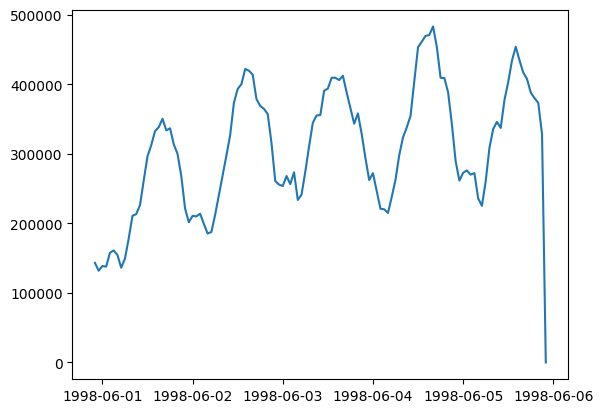

In [7]:
plt.plot(df_H["date"], df_H["count"])

In [21]:
df_M = df.groupby(pd.Grouper(key="date", freq="min")).sum().reset_index()


In [22]:
df_M

,date,Unnamed: 0,count
0,1998-05-31 22:00:00,1711,1914
1,1998-05-31 22:01:00,5310,2558
2,1998-05-31 22:02:00,8910,2394
3,1998-05-31 22:03:00,12510,2052
4,1998-05-31 22:04:00,16110,2366
...,...,...,...
7196,1998-06-05 21:56:00,641550,4995
7197,1998-06-05 21:57:00,645150,5169
7198,1998-06-05 21:58:00,648750,5433
7199,1998-06-05 21:59:00,652350,5303


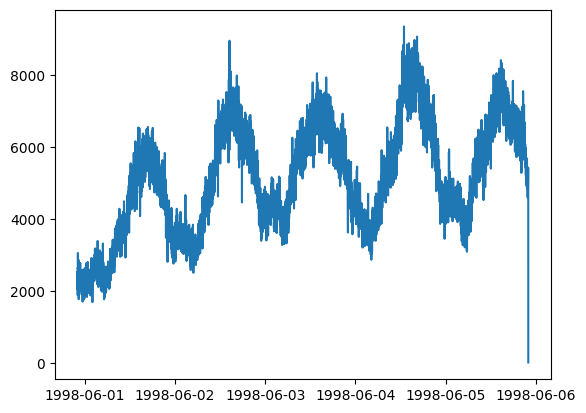

In [26]:
plt.plot(df_M["date"], df_M["count"])

In [27]:
pd.qcut(df_M["date"],100)

0       (1998-05-31 21:59:59.999999999, 1998-05-31 23:...
1       (1998-05-31 21:59:59.999999999, 1998-05-31 23:...
2       (1998-05-31 21:59:59.999999999, 1998-05-31 23:...
3       (1998-05-31 21:59:59.999999999, 1998-05-31 23:...
4       (1998-05-31 21:59:59.999999999, 1998-05-31 23:...
                              ...                        
7196           (1998-06-05 20:48:00, 1998-06-05 22:00:00]
7197           (1998-06-05 20:48:00, 1998-06-05 22:00:00]
7198           (1998-06-05 20:48:00, 1998-06-05 22:00:00]
7199           (1998-06-05 20:48:00, 1998-06-05 22:00:00]
7200           (1998-06-05 20:48:00, 1998-06-05 22:00:00]
Name: date, Length: 7201, dtype: category
Categories (100, interval[datetime64[ns], right]): [(1998-05-31 21:59:59.999999999, 1998-05-31 23:... < (1998-05-31 23:12:00, 1998-06-01 00:24:00] < (1998-06-01 00:24:00, 1998-06-01 01:36:00] < (1998-06-01 01:36:00, 1998-06-01 02:48:00] ... (1998-06-05 17:12:00, 1998-06-05 18:24:00] < (1998-06-05 18:24:00, 1998-06-05 1

In [24]:
df_M["bin"] = pd.qcut(df_M["date"],100, labels=False)
df_M

,date,Unnamed: 0,count,bin
0,1998-05-31 22:00:00,1711,1914,0
1,1998-05-31 22:01:00,5310,2558,0
2,1998-05-31 22:02:00,8910,2394,0
3,1998-05-31 22:03:00,12510,2052,0
4,1998-05-31 22:04:00,16110,2366,0
...,...,...,...,...
7196,1998-06-05 21:56:00,641550,4995,99
7197,1998-06-05 21:57:00,645150,5169,99
7198,1998-06-05 21:58:00,648750,5433,99
7199,1998-06-05 21:59:00,652350,5303,99


In [15]:
q

0       (1998-05-31 21:59:59.999999999, 1998-05-31 23:...
1       (1998-05-31 21:59:59.999999999, 1998-05-31 23:...
2       (1998-05-31 21:59:59.999999999, 1998-05-31 23:...
3       (1998-05-31 21:59:59.999999999, 1998-05-31 23:...
4       (1998-05-31 21:59:59.999999999, 1998-05-31 23:...
                              ...                        
7196           (1998-06-05 20:48:00, 1998-06-05 22:00:00]
7197           (1998-06-05 20:48:00, 1998-06-05 22:00:00]
7198           (1998-06-05 20:48:00, 1998-06-05 22:00:00]
7199           (1998-06-05 20:48:00, 1998-06-05 22:00:00]
7200           (1998-06-05 20:48:00, 1998-06-05 22:00:00]
Name: date, Length: 7201, dtype: category
Categories (100, interval[datetime64[ns], right]): [(1998-05-31 21:59:59.999999999, 1998-05-31 23:... < (1998-05-31 23:12:00, 1998-06-01 00:24:00] < (1998-06-01 00:24:00, 1998-06-01 01:36:00] < (1998-06-01 01:36:00, 1998-06-01 02:48:00] ... (1998-06-05 17:12:00, 1998-06-05 18:24:00] < (1998-06-05 18:24:00, 1998-06-05 1

In [16]:
bins[0]

Timestamp('1998-05-31 22:00:00')

In [25]:
df_M[df_M["bin"] == 0]

,date,Unnamed: 0,count,bin
0,1998-05-31 22:00:00,1711,1914,0
1,1998-05-31 22:01:00,5310,2558,0
2,1998-05-31 22:02:00,8910,2394,0
3,1998-05-31 22:03:00,12510,2052,0
4,1998-05-31 22:04:00,16110,2366,0
...,...,...,...,...
68,1998-05-31 23:08:00,246510,1917,0
69,1998-05-31 23:09:00,250110,2051,0
70,1998-05-31 23:10:00,253710,2244,0
71,1998-05-31 23:11:00,257310,2181,0


In [27]:
df_M

,date,Unnamed: 0,count,bin
0,1998-05-31 22:00:00,1711,1914,0
1,1998-05-31 22:01:00,5310,2558,0
2,1998-05-31 22:02:00,8910,2394,0
3,1998-05-31 22:03:00,12510,2052,0
4,1998-05-31 22:04:00,16110,2366,0
...,...,...,...,...
7196,1998-06-05 21:56:00,641550,4995,99
7197,1998-06-05 21:57:00,645150,5169,99
7198,1998-06-05 21:58:00,648750,5433,99
7199,1998-06-05 21:59:00,652350,5303,99


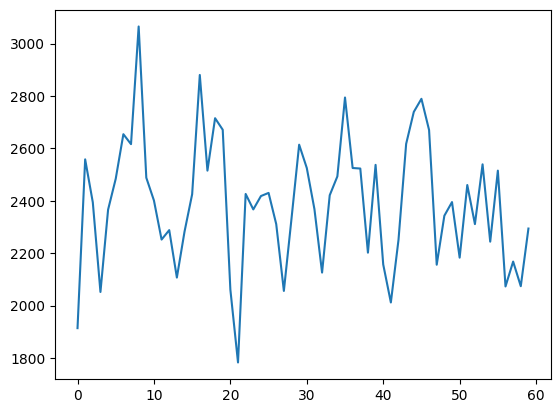

In [30]:
plt.plot(df_M[0:60]["count"])

In [32]:
import numpy as np
np.linalg.norm(df_M[0:60]["count"].to_numpy() - df_M[61:121]["count"].to_numpy())

3069.9711725030907

In [33]:
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [38]:
df_M[0:60]

,date,Unnamed: 0,count,bin
0,1998-05-31 22:00:00,1711,1914,0
1,1998-05-31 22:01:00,5310,2558,0
2,1998-05-31 22:02:00,8910,2394,0
3,1998-05-31 22:03:00,12510,2052,0
4,1998-05-31 22:04:00,16110,2366,0
5,1998-05-31 22:05:00,19710,2484,0
6,1998-05-31 22:06:00,23310,2654,0
7,1998-05-31 22:07:00,26910,2616,0
8,1998-05-31 22:08:00,30510,3065,0
9,1998-05-31 22:09:00,34110,2488,0


In [39]:
df_M[60:120]

,date,Unnamed: 0,count,bin
60,1998-05-31 23:00:00,217710,2419,0
61,1998-05-31 23:01:00,221310,2498,0
62,1998-05-31 23:02:00,224910,2350,0
63,1998-05-31 23:03:00,228510,2251,0
64,1998-05-31 23:04:00,232110,2016,0
65,1998-05-31 23:05:00,235710,2076,0
66,1998-05-31 23:06:00,239310,2151,0
67,1998-05-31 23:07:00,242910,2203,0
68,1998-05-31 23:08:00,246510,1917,0
69,1998-05-31 23:09:00,250110,2051,0


In [36]:
cos_sim(df_M[0:60]["count"].to_numpy(), df_M[60:120]["count"].to_numpy())
cos_sim(df_M[120:180]["count"].to_numpy(), df_M[180:240]["count"].to_numpy())

0.9893318115537272

In [35]:
len(df_M)

7201

In [52]:
sims = []
i = 1
while True:
    try:
        sim = cos_sim(df_M[(i-1)*60:i*60]["count"].to_numpy(), df_M[i*60:(i+1)*60]["count"].to_numpy())
        sims.append((sim, i))
        i += 2
    except Exception as e:
        print(e)
        print(f"finish: {i}")
        break

shapes (1,) and (0,) not aligned: 1 (dim 0) != 0 (dim 0)
finish: 121


In [53]:
sims

[(0.9887467014711502, 1),
 (0.9923682258154352, 3),
 (0.9905238660083447, 5),
 (0.9880627252098589, 7),
 (0.9942431433248025, 9),
 (0.9931674808807242, 11),
 (0.993787623588053, 13),
 (0.9932716328697274, 15),
 (0.9950063379777826, 17),
 (0.9972181905281127, 19),
 (0.9951673655058971, 21),
 (0.9933707838737235, 23),
 (0.9909205188371737, 25),
 (0.9940243855182977, 27),
 (0.9951176588918041, 29),
 (0.9942149852577241, 31),
 (0.9940342970910361, 33),
 (0.9958123520593526, 35),
 (0.9939365182794787, 37),
 (0.9973753703210332, 39),
 (0.9961592233214358, 41),
 (0.9959924619779581, 43),
 (0.9969874798656471, 45),
 (0.9967581992086793, 47),
 (0.9898036616146205, 49),
 (0.9944726214192418, 51),
 (0.9925101505103866, 53),
 (0.9952598448227951, 55),
 (0.992449352567579, 57),
 (0.9952079299820703, 59),
 (0.9970821730140924, 61),
 (0.9962945895870741, 63),
 (0.9962370782442181, 65),
 (0.9964694654775766, 67),
 (0.9955433411802304, 69),
 (0.9926925722609458, 71),
 (0.9919477960407896, 73),
 (0.9928

In [56]:
sorted(sims)

[(0.9880627252098589, 7),
 (0.9887467014711502, 1),
 (0.9898036616146205, 49),
 (0.9905238660083447, 5),
 (0.9909205188371737, 25),
 (0.991163259252194, 87),
 (0.9919477960407896, 73),
 (0.9923682258154352, 3),
 (0.9923937538978123, 119),
 (0.992449352567579, 57),
 (0.9925101505103866, 53),
 (0.9926925722609458, 71),
 (0.9927188377967312, 99),
 (0.9928199869768424, 75),
 (0.9931312787235336, 97),
 (0.9931674808807242, 11),
 (0.9932716328697274, 15),
 (0.993359740009354, 79),
 (0.9933707838737235, 23),
 (0.993787623588053, 13),
 (0.9939365182794787, 37),
 (0.9940243855182977, 27),
 (0.9940342970910361, 33),
 (0.994208899738652, 105),
 (0.9942149852577241, 31),
 (0.9942431433248025, 9),
 (0.9943972089794475, 95),
 (0.9944726214192418, 51),
 (0.9946242164062425, 103),
 (0.9949818950899261, 109),
 (0.9950063379777826, 17),
 (0.9950672706849234, 77),
 (0.9951176588918041, 29),
 (0.9951673655058971, 21),
 (0.9952079299820703, 59),
 (0.9952348279310327, 85),
 (0.9952598448227951, 55),
 (0.995

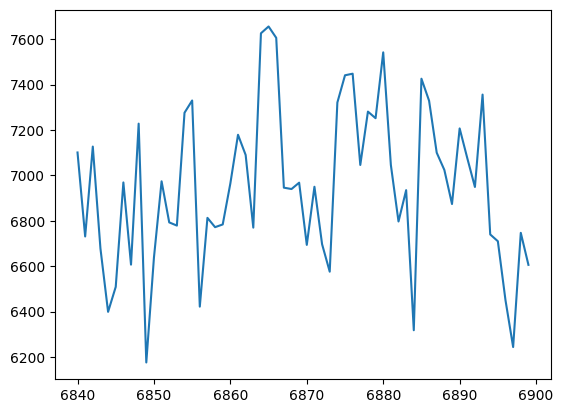

In [57]:
plt.plot(df_M[(115-1)*60:115*60]["count"])

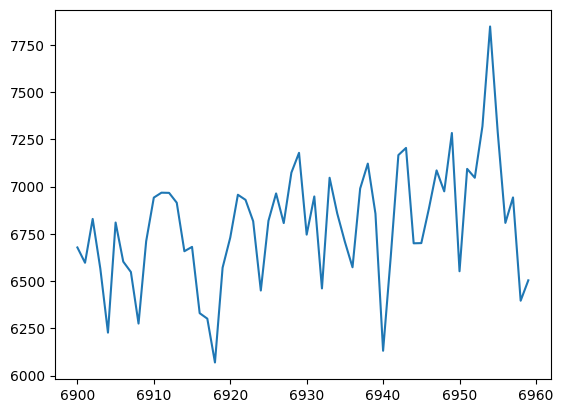

In [58]:
plt.plot(df_M[(115)*60:(115+1)*60]["count"])